# Integrative Industry Synthesis (Capstone)

### Assurance-Centered Agentic AIOps: Parallel Contested Orchestration for Industrial DevSecAIOps

This notebook is a system-level execution and analysis harness for an integrated local-cloud IIoT/OT DevSecAIOps workflow. It integrates outputs from prior capstone (P3~P6) stages into a unified decision pipeline with explicit governance, traceability, and bounded agentic behavior. The objective is to evaluate cross-layer technical and ethical tradeoffs under realistic safety and operational constraints.

Dataset and artifact sources used in this integrated workflow:
- P3: `P3/data/processed/nvd_kev_model_data.csv`
- P4: `P4/data/processed/rtiot2022_binary_rs42_n120000_split_arrays.npz`
- P5: `P5/data/processed/p5_generated_rca_artifacts.csv`
- P6: `P6/outputs/decision_packets.jsonl`, `P6/outputs/run_summary.json`

Project repository:
- https://github.com/Ohara124c41/integrated-industrial-application-acaa




## Motivation

Industrial cyber operations require architectural decisions that balance two goals that are often in conflict: security assurance and continuity of operations. A single-model view can obscure this tradeoff, so this notebook uses integrated artifacts from P3-P6 to expose each decision step, preserve traceability, and support accountable escalation.

The integrated packet contract is intentionally compact (`n=5` incidents in this run) but information-rich (`25` columns), which is sufficient to demonstrate cross-domain synthesis: vulnerability context (P3), telemetry priors (P4), generative RCA outputs (P5), and agentic governance outputs (P6). This design makes policy behavior auditable while preserving room for bounded LLM enrichment.

The objective is not autonomous remediation. The objective is defensible decision support: explicit uncertainty, explicit policy gating, explicit framework traceability (NIST/IEC/CMMC), and explicit human override boundaries for safety-critical IIoT/OT settings.



## Architecture Context

The integrated system merges vulnerability priors, telemetry risk profiling, generative RCA narratives, and policy-gated agentic decisions. This ordering is intentional: upstream signals inform context, while governance remains the final authority for operational action.
Below, the top image illustrates the general system pipeline (capstone flow), and the bottom images shows the various components of the overall system (expanded, lower level abstraction).
![System Pipeline](diagrams/system-pipeline.png)

![System Architecture](diagrams/sys-arch-01.png)



## Threat Model

This synthesis uses an explicit threat model to anchor architectural decisions and avoid generic security claims.

- Assets: incident decision packets, governance policy state, RCA narratives, framework-control evidence, and audit logs.
- Adversaries: external actors attempting lateral movement/exfiltration, and instruction-channel attackers attempting prompt injection into reasoning workflows.
- Trust boundaries: ingestion boundary (artifact integrity), orchestration boundary (branch/meta decisions), and action boundary (policy/HITL gate before operational recommendations).
- Security objectives: preserve policy invariants, prevent unsafe automation, maintain decision traceability, and support bounded human adjudication.

The threat-model is visualized below: 
![Threat Model](diagrams/threat-model.png)




## 1) Environment and Imports

Before any integration logic runs, we verify core scientific, visualization, and governance libraries. This avoids attributing environment failures to system behavior during later analysis.



In [81]:
import json
import warnings
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

sns.set_theme(style='whitegrid')
warnings.filterwarnings('ignore')

ROOT = Path.cwd()
if (ROOT / 'integration_runtime.py').exists() is False and (ROOT / 'P7' / 'integration_runtime.py').exists():
    ROOT = ROOT / 'P7'

if str(ROOT.resolve()) not in sys.path:
    sys.path.insert(0, str(ROOT.resolve()))

print({'root': str(ROOT.resolve())})


{'root': 'C:\\Users\\Ohara\\Desktop\\__Udacity\\__MSc_Project\\P7'}


The environment check should return the active project root. If this points to `.../P7`, subsequent relative paths will resolve correctly for integrated execution.



## 2) Artifact Availability Check

Integration quality depends on input integrity. This check confirms required upstream artifacts are present before runtime assembly and evaluation.



In [82]:
required_paths = [
    ROOT.parent / 'P3' / 'data' / 'processed' / 'nvd_kev_model_data.csv',
    ROOT.parent / 'P4' / 'data' / 'processed' / 'rtiot2022_binary_rs42_n120000_split_arrays.npz',
    ROOT.parent / 'P4' / 'data' / 'processed' / 'rtiot2022_binary_rs42_n120000_metadata.json',
    ROOT.parent / 'P5' / 'data' / 'processed' / 'p5_generated_rca_artifacts.csv',
    ROOT.parent / 'P6' / 'outputs' / 'decision_packets.jsonl',
    ROOT.parent / 'P6' / 'outputs' / 'run_summary.json',
]

availability = pd.DataFrame({
    'artifact': [str(p) for p in required_paths],
    'exists': [p.exists() for p in required_paths],
})
display(availability)

missing = availability.loc[~availability['exists'], 'artifact'].tolist()
if missing:
    raise FileNotFoundError(f'Missing required artifacts: {missing}')


,artifact,exists
0,c:\Users\Ohara\Desktop\__Udacity\__MSc_Project...,True
1,c:\Users\Ohara\Desktop\__Udacity\__MSc_Project...,True
2,c:\Users\Ohara\Desktop\__Udacity\__MSc_Project...,True
3,c:\Users\Ohara\Desktop\__Udacity\__MSc_Project...,True
4,c:\Users\Ohara\Desktop\__Udacity\__MSc_Project...,True
5,c:\Users\Ohara\Desktop\__Udacity\__MSc_Project...,True


A complete availability table indicates the integration can run reproducibly without manual patching. If any artifacts are missing, stop and resolve before continuing.



## 3) Build Integrated Packets

This step executes the dedicated runtime (`integration_runtime.py`) to construct a unified packet schema from P3-P6 outputs. Keeping this logic in a script improves reproducibility and keeps notebook cells focused on analysis.



In [83]:
import importlib.util

runtime_path = ROOT / 'integration_runtime.py'
spec = importlib.util.spec_from_file_location('integration_runtime', runtime_path)
runtime = importlib.util.module_from_spec(spec)
spec.loader.exec_module(runtime)

summary = runtime.run_integration(ROOT / 'outputs', runtime.default_paths())
print(json.dumps(summary, indent=2))


{
  "run_count": 5,
  "decision_distribution": {
    "escalate": 4,
    "refuse": 1
  },
  "packet_completeness_rate": 1.0,
  "policy_pass_rate": 0.4,
  "escalation_rate": 1.0,
  "mean_hypothesis_confidence": 0.8187,
  "mean_attack_technique_count": 2.0,
  "zones": [
    "IT_DMZ",
    "OT_CONTROL",
    "OT_SUPERVISORY"
  ],
  "source_run_summary": {
    "run_count": 5,
    "incident_ids": [
      "INC_A_HIGH",
      "INC_B_AMBIG",
      "INC_C_PROMPT_INJECT",
      "INC_D_POLICY",
      "INC_E_ZONE"
    ],
    "decision_types": {
      "propose": 0,
      "escalate": 4,
      "refuse": 1,
      "defer": 0
    },
    "escalation_rate": 1.0,
    "policy_pass_rate": 0.4,
    "mean_evidence_quality": 0.74,
    "mean_hypothesis_confidence": 0.8187,
    "zones": [
      "IT_DMZ",
      "OT_CONTROL",
      "OT_SUPERVISORY"
    ],
    "nist_watch_count": 2,
    "iec_watch_count": 3,
    "llm_runtime": {
      "arg_use_llm": true,
      "model": "gpt-4o-mini",
      "debug": {
        "enabled"

The summary should show integrated packet count, decision distribution, completeness rate, policy pass rate, and confidence statistics. In this run, the baseline is 5 packets, decision distribution `escalate=4/refuse=1`, `policy_pass_rate=0.4`, and `mean_hypothesis_confidence=0.8187`; these values anchor later governance and tradeoff interpretation.



## 3B) Advanced Agentic Comparison (Deterministic vs LLM)

The integrated design includes a controlled agentic comparison to separate policy logic from model-enriched language behavior. Running both modes on identical scenarios helps quantify whether LLM assistance changes governance outcomes, confidence, or only explanation phrasing.



In [84]:
runtime.load_local_env()
cmp = runtime.run_agentic_comparison(ROOT / 'outputs', model='gpt-4o-mini')
display(pd.DataFrame(cmp['deltas']))
display(pd.DataFrame([{
    'decision_change_rate': cmp['decision_change_rate'],
    'policy_change_rate': cmp['policy_change_rate'],
    'confidence_change_rate': cmp['confidence_change_rate'],
    'det_unique_ratio': cmp['det_text_diversity'].get('unique_ratio'),
    'llm_unique_ratio': cmp['llm_text_diversity'].get('unique_ratio'),
    'det_mean_similarity': cmp['det_text_diversity'].get('mean_pairwise_similarity'),
    'llm_mean_similarity': cmp['llm_text_diversity'].get('mean_pairwise_similarity'),
}]))

llm_trace = ROOT / 'outputs' / 'agent_llm' / 'llm_calls.jsonl'
llm_calls = 0
if llm_trace.exists():
    with llm_trace.open('r', encoding='utf-8') as f:
        llm_calls = sum(1 for _ in f)
print({'llm_trace_exists': llm_trace.exists(), 'llm_calls': llm_calls, 'trace_path': str(llm_trace)})


,incident_id,det_decision_type,llm_decision_type,decision_changed,det_policy_passed,llm_policy_passed,policy_changed,det_conf,llm_conf,conf_changed
0,INC_A_HIGH,escalate,escalate,False,False,False,False,0.9195,0.9195,False
1,INC_B_AMBIG,escalate,escalate,False,False,False,False,0.7130,0.7130,False
2,INC_C_PROMPT_INJECT,refuse,refuse,False,True,True,False,0.8110,0.8110,False
3,INC_D_POLICY,escalate,escalate,False,False,False,False,0.8530,0.8530,False
4,INC_E_ZONE,escalate,escalate,False,True,True,False,0.7970,0.7970,False


,decision_change_rate,policy_change_rate,confidence_change_rate,det_unique_ratio,llm_unique_ratio,det_mean_similarity,llm_mean_similarity
0,0.0,0.0,0.0,0.2,1.0,1.0,0.578


{'llm_trace_exists': True, 'llm_calls': 50, 'trace_path': 'c:\\Users\\Ohara\\Desktop\\__Udacity\\__MSc_Project\\P7\\outputs\\agent_llm\\llm_calls.jsonl'}


If decision and policy deltas remain zero while text diversity changes, the architecture is behaving as intended: governance remains deterministic while LLM adds bounded explanatory refinement. In this run, decision and policy deltas are both `0.0`, while text diversity shifts from deterministic `unique_ratio=0.2` to LLM `unique_ratio=1.0`, supporting the bounded-enrichment design.



## 3C) Contested Dual-Orchestrator Modeling (LangChain + LangGraph)

To model system-architect adjudication explicitly, this section runs two orchestrator branches with different objectives: security assurance and operations continuity. A meta-orchestrator then selects a branch under shared constraints, and flags cases where human review is required.



In [85]:
import os
import importlib
import contested_orchestration as contested

# Force reload so notebook runs always use the latest orchestration logic.
contested = importlib.reload(contested)

USE_CONTESTED_LLM = os.getenv('P7_CONTESTED_LLM', '0').strip().lower() in {'1','true','yes','on'}
CONTESTED_MODEL = os.getenv('P7_CONTESTED_MODEL', 'gpt-4o-mini').strip() or 'gpt-4o-mini'
USE_CONTESTED_META_LLM = os.getenv('P7_CONTESTED_META_LLM', '1').strip().lower() in {'1','true','yes','on'}
try:
    CONTESTED_LLM_PASSES = max(1, int((os.getenv('P7_CONTESTED_LLM_PASSES', '2') or '2').strip()))
except Exception:
    CONTESTED_LLM_PASSES = 2

llm_trace = ROOT / 'outputs' / 'llm_calls.jsonl'
pre_llm_calls = 0
if llm_trace.exists():
    with llm_trace.open('r', encoding='utf-8') as f:
        pre_llm_calls = sum(1 for _ in f)

contested_out = contested.run_contested_orchestration(
    integrated_packets_path=ROOT / 'outputs' / 'integrated_packets.jsonl',
    output_dir=ROOT / 'outputs',
    llm_enabled=USE_CONTESTED_LLM,
    model=CONTESTED_MODEL,
    llm_passes=CONTESTED_LLM_PASSES,
    meta_llm_enabled=USE_CONTESTED_META_LLM,
)

display(pd.DataFrame(contested_out['branch_packets']).head(10))
display(pd.DataFrame(contested_out['meta_decisions']))
display(pd.DataFrame(contested_out['responsibility_log']))
display(pd.DataFrame([contested_out['summary']]))

post_llm_calls = 0
if llm_trace.exists():
    with llm_trace.open('r', encoding='utf-8') as f:
        post_llm_calls = sum(1 for _ in f)

# Derived invariants directly from packet outputs for transparent validation.
_meta_df = pd.DataFrame(contested_out['meta_decisions'])
if len(_meta_df) > 0:
    _policy_pass = _meta_df['cross_constraint_checks'].apply(lambda d: bool(d.get('policy_passed', False)) if isinstance(d, dict) else False)
    _final_rec = _meta_df['final_recommendation'].astype(str)
    _derived_policy_gate_violations = int((~_policy_pass & (_final_rec != 'escalate')).sum())
else:
    _derived_policy_gate_violations = np.nan

print({
    'contested_llm_enabled': USE_CONTESTED_LLM,
    'contested_meta_llm_enabled': USE_CONTESTED_META_LLM,
    'contested_llm_passes': CONTESTED_LLM_PASSES,
    'model': CONTESTED_MODEL,
    'llm_trace_exists': llm_trace.exists(),
    'llm_calls_total': post_llm_calls,
    'llm_calls_delta_this_run': max(0, post_llm_calls - pre_llm_calls),
    'derived_policy_gate_violations': _derived_policy_gate_violations,
})

mode_label = 'LLM-enriched contested run' if USE_CONTESTED_LLM else 'Deterministic contested run (LLM disabled)'
print({
    'mode_label': mode_label,
    'interpretation': 'Branch/meta scoring and policy gates are deterministic; LLM only enriches rationale text when enabled.'
})


,incident_id,branch_id,objective_weights,branch_score,branch_recommendation,branch_tradeoff_note,branch_deliberation_notes,policy_violations,responsibility_log,llm_enriched,llm_passes
0,INC_A_HIGH,security_assurance,"{'risk': 0.5, 'attack_surface': 0.25, 'policy'...",0.8925,escalate,Refine this defensive rationale in 1-2 lines w...,"[{'pass_index': 1, 'text': 'Incident INC_A_HIG...",[policy_failed_in_packet],"[{'incident_id': 'INC_A_HIGH', 'layer': 'branc...",False,2
1,INC_A_HIGH,operations_continuity,"{'continuity': 0.45, 'policy_cleanliness': 0.3...",0.1784,escalate,Refine this defensive rationale in 1-2 lines w...,"[{'pass_index': 1, 'text': 'Incident INC_A_HIG...",[policy_failed_in_packet],"[{'incident_id': 'INC_A_HIGH', 'layer': 'branc...",False,2
2,INC_B_AMBIG,security_assurance,"{'risk': 0.5, 'attack_surface': 0.25, 'policy'...",0.5925,escalate,Refine this defensive rationale in 1-2 lines w...,"[{'pass_index': 1, 'text': 'Incident INC_B_AMB...",[policy_failed_in_packet],"[{'incident_id': 'INC_B_AMBIG', 'layer': 'bran...",False,2
3,INC_B_AMBIG,operations_continuity,"{'continuity': 0.45, 'policy_cleanliness': 0.3...",0.3049,escalate,Refine this defensive rationale in 1-2 lines w...,"[{'pass_index': 1, 'text': 'Incident INC_B_AMB...",[policy_failed_in_packet],"[{'incident_id': 'INC_B_AMBIG', 'layer': 'bran...",False,2
4,INC_C_PROMPT_INJECT,security_assurance,"{'risk': 0.5, 'attack_surface': 0.25, 'policy'...",0.5350,propose,Refine this defensive rationale in 1-2 lines w...,"[{'pass_index': 1, 'text': 'Incident INC_C_PRO...",[],"[{'incident_id': 'INC_C_PROMPT_INJECT', 'layer...",False,2
5,INC_C_PROMPT_INJECT,operations_continuity,"{'continuity': 0.45, 'policy_cleanliness': 0.3...",0.5477,escalate,Refine this defensive rationale in 1-2 lines w...,"[{'pass_index': 1, 'text': 'Incident INC_C_PRO...",[],"[{'incident_id': 'INC_C_PROMPT_INJECT', 'layer...",False,2
6,INC_D_POLICY,security_assurance,"{'risk': 0.5, 'attack_surface': 0.25, 'policy'...",0.7950,escalate,Refine this defensive rationale in 1-2 lines w...,"[{'pass_index': 1, 'text': 'Incident INC_D_POL...",[policy_failed_in_packet],"[{'incident_id': 'INC_D_POLICY', 'layer': 'bra...",False,2
7,INC_D_POLICY,operations_continuity,"{'continuity': 0.45, 'policy_cleanliness': 0.3...",0.2000,escalate,Refine this defensive rationale in 1-2 lines w...,"[{'pass_index': 1, 'text': 'Incident INC_D_POL...",[policy_failed_in_packet],"[{'incident_id': 'INC_D_POLICY', 'layer': 'bra...",False,2
8,INC_E_ZONE,security_assurance,"{'risk': 0.5, 'attack_surface': 0.25, 'policy'...",0.5150,propose,Refine this defensive rationale in 1-2 lines w...,"[{'pass_index': 1, 'text': 'Incident INC_E_ZON...",[],"[{'incident_id': 'INC_E_ZONE', 'layer': 'branc...",False,2
9,INC_E_ZONE,operations_continuity,"{'continuity': 0.45, 'policy_cleanliness': 0.3...",0.5635,propose,Refine this defensive rationale in 1-2 lines w...,"[{'pass_index': 1, 'text': 'Incident INC_E_ZON...",[],"[{'incident_id': 'INC_E_ZONE', 'layer': 'branc...",False,2


,incident_id,candidate_branches,selected_branch,selection_rationale,cross_constraint_checks,disagreement_flags,hitl_required,final_recommendation,meta_advisory_note,meta_llm_enriched,responsibility_log,meta_timestamp_utc,hitl_override
0,INC_A_HIGH,"[{'incident_id': 'INC_A_HIGH', 'branch_id': 's...",security_assurance,Policy failure triggers safety-first selection.,"{'policy_passed': False, 'zone': 'OT_CONTROL',...","{'recommendation_disagreement': False, 'score_...",False,escalate,Generate a concise defensive meta-adjudication...,False,"[{'incident_id': 'INC_A_HIGH', 'layer': 'meta'...",2026-02-21T07:52:37.378440+00:00,"{'applied': False, 'blocked_by_policy_gate': F..."
1,INC_B_AMBIG,"[{'incident_id': 'INC_B_AMBIG', 'branch_id': '...",security_assurance,Policy failure triggers safety-first selection.,"{'policy_passed': False, 'zone': 'OT_SUPERVISO...","{'recommendation_disagreement': False, 'score_...",False,escalate,Generate a concise defensive meta-adjudication...,False,"[{'incident_id': 'INC_B_AMBIG', 'layer': 'meta...",2026-02-21T07:52:37.384581+00:00,"{'applied': False, 'blocked_by_policy_gate': F..."
2,INC_C_PROMPT_INJECT,"[{'incident_id': 'INC_C_PROMPT_INJECT', 'branc...",operations_continuity,Continuity branch score is higher while policy...,"{'policy_passed': True, 'zone': 'IT_DMZ', 'att...","{'recommendation_disagreement': True, 'score_d...",True,escalate,Generate a concise defensive meta-adjudication...,False,"[{'incident_id': 'INC_C_PROMPT_INJECT', 'layer...",2026-02-21T07:52:37.385023+00:00,"{'applied': False, 'blocked_by_policy_gate': F..."
3,INC_D_POLICY,"[{'incident_id': 'INC_D_POLICY', 'branch_id': ...",security_assurance,Policy failure triggers safety-first selection.,"{'policy_passed': False, 'zone': 'OT_CONTROL',...","{'recommendation_disagreement': False, 'score_...",False,escalate,Generate a concise defensive meta-adjudication...,False,"[{'incident_id': 'INC_D_POLICY', 'layer': 'met...",2026-02-21T07:52:37.385023+00:00,"{'applied': False, 'blocked_by_policy_gate': F..."
4,INC_E_ZONE,"[{'incident_id': 'INC_E_ZONE', 'branch_id': 's...",operations_continuity,Continuity branch score is higher while policy...,"{'policy_passed': True, 'zone': 'OT_SUPERVISOR...","{'recommendation_disagreement': False, 'score_...",True,propose,Generate a concise defensive meta-adjudication...,False,"[{'incident_id': 'INC_E_ZONE', 'layer': 'meta'...",2026-02-21T07:52:37.388813+00:00,"{'applied': False, 'blocked_by_policy_gate': F..."


,incident_id,layer,owner,objective,constraints,decision_basis,timestamp_utc
0,INC_A_HIGH,branch,security_assurance_orchestrator,Maximize containment assurance under policy an...,"[policy_gates, attack_surface_weighting, escal...","[risk_score_agentic, attack_technique_count, p...",2026-02-21T07:52:37.378440+00:00
1,INC_A_HIGH,branch,operations_continuity_orchestrator,Minimize disruption while preserving bounded d...,"[policy_cleanliness, confidence_floor, disrupt...","[risk_score_agentic, policy_passed, hypothesis...",2026-02-21T07:52:37.378440+00:00
2,INC_A_HIGH,meta,meta_orchestrator,Resolve branch contention under cross-cutting ...,"[global_policy_gates, zone_conduit_bounds, att...","[branch_scores, policy_passed, recommendation_...",2026-02-21T07:52:37.378440+00:00
3,INC_B_AMBIG,branch,security_assurance_orchestrator,Maximize containment assurance under policy an...,"[policy_gates, attack_surface_weighting, escal...","[risk_score_agentic, attack_technique_count, p...",2026-02-21T07:52:37.384194+00:00
4,INC_B_AMBIG,branch,operations_continuity_orchestrator,Minimize disruption while preserving bounded d...,"[policy_cleanliness, confidence_floor, disrupt...","[risk_score_agentic, policy_passed, hypothesis...",2026-02-21T07:52:37.383820+00:00
5,INC_B_AMBIG,meta,meta_orchestrator,Resolve branch contention under cross-cutting ...,"[global_policy_gates, zone_conduit_bounds, att...","[branch_scores, policy_passed, recommendation_...",2026-02-21T07:52:37.384581+00:00
6,INC_C_PROMPT_INJECT,branch,security_assurance_orchestrator,Maximize containment assurance under policy an...,"[policy_gates, attack_surface_weighting, escal...","[risk_score_agentic, attack_technique_count, p...",2026-02-21T07:52:37.385023+00:00
7,INC_C_PROMPT_INJECT,branch,operations_continuity_orchestrator,Minimize disruption while preserving bounded d...,"[policy_cleanliness, confidence_floor, disrupt...","[risk_score_agentic, policy_passed, hypothesis...",2026-02-21T07:52:37.385023+00:00
8,INC_C_PROMPT_INJECT,meta,meta_orchestrator,Resolve branch contention under cross-cutting ...,"[global_policy_gates, zone_conduit_bounds, att...","[branch_scores, policy_passed, recommendation_...",2026-02-21T07:52:37.385023+00:00
9,INC_D_POLICY,branch,security_assurance_orchestrator,Maximize containment assurance under policy an...,"[policy_gates, attack_surface_weighting, escal...","[risk_score_agentic, attack_technique_count, p...",2026-02-21T07:52:37.385023+00:00


,incident_count,branch_row_count,disagreement_rate,hitl_required_rate,hitl_override_rate,selected_branch_distribution,llm_enabled,model,llm_passes,meta_llm_enabled,policy_gate_invariant_violations,blocked_override_rate
0,5,10,0.2,0.4,0.0,"{'security_assurance': 3, 'operations_continui...",False,gpt-4o-mini,2,True,0,0.0


{'contested_llm_enabled': False, 'contested_meta_llm_enabled': True, 'contested_llm_passes': 2, 'model': 'gpt-4o-mini', 'llm_trace_exists': False, 'llm_calls_total': 0, 'llm_calls_delta_this_run': 0, 'derived_policy_gate_violations': 0}
{'mode_label': 'Deterministic contested run (LLM disabled)', 'interpretation': 'Branch/meta scoring and policy gates are deterministic; LLM only enriches rationale text when enabled.'}


Branch-level responsibility logs make ownership explicit: each branch states objective, constraints, and decision basis, while the meta layer records cross-constraint adjudication responsibility. In this run, contested orchestration reports `disagreement_rate=0.2`, `hitl_required_rate=0.4`, selected branches `security_assurance=3` and `operations_continuity=2`, with `policy_gate_invariant_violations=0`. With `P7_CONTESTED_LLM=1`, each branch can run multi-pass rationale refinement (`P7_CONTESTED_LLM_PASSES`) and an optional meta advisory note (`P7_CONTESTED_META_LLM=1`), while final selection remains constrained by deterministic safety gates.



## 3D) Human-in-the-Loop (HITL) Override Simulation

This cell applies optional top-layer human overrides on selected incidents. It is designed so the operator rationale is explicitly logged for accountability and replay.



In [86]:
hitl_overrides = {
    # Example override template. Uncomment/modify as needed.
    # 'INC_B_AMBIG': {
    #     'selected_branch': 'operations_continuity',
    #     'operator_id': 'christopher_ohara',
    #     'reason': 'Preserve uptime while maintaining monitored containment window.'
    # }
}

contested_hitl = contested.run_contested_orchestration(
    integrated_packets_path=ROOT / 'outputs' / 'integrated_packets.jsonl',
    output_dir=ROOT / 'outputs',
    hitl_overrides=hitl_overrides,
    write_suffix='hitl',
    llm_enabled=USE_CONTESTED_LLM,
    model=CONTESTED_MODEL,
    llm_passes=CONTESTED_LLM_PASSES,
    meta_llm_enabled=USE_CONTESTED_META_LLM,
)

display(pd.DataFrame(contested_hitl['meta_decisions']))
display(pd.DataFrame(contested_hitl['responsibility_log']))
display(pd.DataFrame([contested_hitl['summary']]))
print('Saved:', ROOT / 'outputs' / 'meta_decisions_hitl.jsonl')
print('Saved:', ROOT / 'outputs' / 'responsibility_log_hitl.jsonl')


,incident_id,candidate_branches,selected_branch,selection_rationale,cross_constraint_checks,disagreement_flags,hitl_required,final_recommendation,meta_advisory_note,meta_llm_enriched,responsibility_log,meta_timestamp_utc,hitl_override
0,INC_A_HIGH,"[{'incident_id': 'INC_A_HIGH', 'branch_id': 's...",security_assurance,Policy failure triggers safety-first selection.,"{'policy_passed': False, 'zone': 'OT_CONTROL',...","{'recommendation_disagreement': False, 'score_...",False,escalate,Generate a concise defensive meta-adjudication...,False,"[{'incident_id': 'INC_A_HIGH', 'layer': 'meta'...",2026-02-21T07:52:37.460185+00:00,"{'applied': False, 'blocked_by_policy_gate': F..."
1,INC_B_AMBIG,"[{'incident_id': 'INC_B_AMBIG', 'branch_id': '...",security_assurance,Policy failure triggers safety-first selection.,"{'policy_passed': False, 'zone': 'OT_SUPERVISO...","{'recommendation_disagreement': False, 'score_...",False,escalate,Generate a concise defensive meta-adjudication...,False,"[{'incident_id': 'INC_B_AMBIG', 'layer': 'meta...",2026-02-21T07:52:37.460185+00:00,"{'applied': False, 'blocked_by_policy_gate': F..."
2,INC_C_PROMPT_INJECT,"[{'incident_id': 'INC_C_PROMPT_INJECT', 'branc...",operations_continuity,Continuity branch score is higher while policy...,"{'policy_passed': True, 'zone': 'IT_DMZ', 'att...","{'recommendation_disagreement': True, 'score_d...",True,escalate,Generate a concise defensive meta-adjudication...,False,"[{'incident_id': 'INC_C_PROMPT_INJECT', 'layer...",2026-02-21T07:52:37.462765+00:00,"{'applied': False, 'blocked_by_policy_gate': F..."
3,INC_D_POLICY,"[{'incident_id': 'INC_D_POLICY', 'branch_id': ...",security_assurance,Policy failure triggers safety-first selection.,"{'policy_passed': False, 'zone': 'OT_CONTROL',...","{'recommendation_disagreement': False, 'score_...",False,escalate,Generate a concise defensive meta-adjudication...,False,"[{'incident_id': 'INC_D_POLICY', 'layer': 'met...",2026-02-21T07:52:37.462765+00:00,"{'applied': False, 'blocked_by_policy_gate': F..."
4,INC_E_ZONE,"[{'incident_id': 'INC_E_ZONE', 'branch_id': 's...",operations_continuity,Continuity branch score is higher while policy...,"{'policy_passed': True, 'zone': 'OT_SUPERVISOR...","{'recommendation_disagreement': False, 'score_...",True,propose,Generate a concise defensive meta-adjudication...,False,"[{'incident_id': 'INC_E_ZONE', 'layer': 'meta'...",2026-02-21T07:52:37.462765+00:00,"{'applied': False, 'blocked_by_policy_gate': F..."


,incident_id,layer,owner,objective,constraints,decision_basis,timestamp_utc
0,INC_A_HIGH,branch,security_assurance_orchestrator,Maximize containment assurance under policy an...,"[policy_gates, attack_surface_weighting, escal...","[risk_score_agentic, attack_technique_count, p...",2026-02-21T07:52:37.460185+00:00
1,INC_A_HIGH,branch,operations_continuity_orchestrator,Minimize disruption while preserving bounded d...,"[policy_cleanliness, confidence_floor, disrupt...","[risk_score_agentic, policy_passed, hypothesis...",2026-02-21T07:52:37.459740+00:00
2,INC_A_HIGH,meta,meta_orchestrator,Resolve branch contention under cross-cutting ...,"[global_policy_gates, zone_conduit_bounds, att...","[branch_scores, policy_passed, recommendation_...",2026-02-21T07:52:37.460185+00:00
3,INC_B_AMBIG,branch,security_assurance_orchestrator,Maximize containment assurance under policy an...,"[policy_gates, attack_surface_weighting, escal...","[risk_score_agentic, attack_technique_count, p...",2026-02-21T07:52:37.460185+00:00
4,INC_B_AMBIG,branch,operations_continuity_orchestrator,Minimize disruption while preserving bounded d...,"[policy_cleanliness, confidence_floor, disrupt...","[risk_score_agentic, policy_passed, hypothesis...",2026-02-21T07:52:37.460185+00:00
5,INC_B_AMBIG,meta,meta_orchestrator,Resolve branch contention under cross-cutting ...,"[global_policy_gates, zone_conduit_bounds, att...","[branch_scores, policy_passed, recommendation_...",2026-02-21T07:52:37.460185+00:00
6,INC_C_PROMPT_INJECT,branch,security_assurance_orchestrator,Maximize containment assurance under policy an...,"[policy_gates, attack_surface_weighting, escal...","[risk_score_agentic, attack_technique_count, p...",2026-02-21T07:52:37.462765+00:00
7,INC_C_PROMPT_INJECT,branch,operations_continuity_orchestrator,Minimize disruption while preserving bounded d...,"[policy_cleanliness, confidence_floor, disrupt...","[risk_score_agentic, policy_passed, hypothesis...",2026-02-21T07:52:37.462765+00:00
8,INC_C_PROMPT_INJECT,meta,meta_orchestrator,Resolve branch contention under cross-cutting ...,"[global_policy_gates, zone_conduit_bounds, att...","[branch_scores, policy_passed, recommendation_...",2026-02-21T07:52:37.462765+00:00
9,INC_D_POLICY,branch,security_assurance_orchestrator,Maximize containment assurance under policy an...,"[policy_gates, attack_surface_weighting, escal...","[risk_score_agentic, attack_technique_count, p...",2026-02-21T07:52:37.462765+00:00


,incident_count,branch_row_count,disagreement_rate,hitl_required_rate,hitl_override_rate,selected_branch_distribution,llm_enabled,model,llm_passes,meta_llm_enabled,policy_gate_invariant_violations,blocked_override_rate
0,5,10,0.2,0.4,0.0,"{'security_assurance': 3, 'operations_continui...",False,gpt-4o-mini,2,True,0,0.0


Saved: c:\Users\Ohara\Desktop\__Udacity\__MSc_Project\P7\outputs\meta_decisions_hitl.jsonl
Saved: c:\Users\Ohara\Desktop\__Udacity\__MSc_Project\P7\outputs\responsibility_log_hitl.jsonl


When HITL overrides are applied, final selection is updated only within safety bounds. Policy-failing incidents are protected by a hard gate that blocks unsafe branch overrides, and the block event is logged for accountability with operator identity, rationale, and timestamp.



## 3E) Contested Diagnostics and High-Value Visuals

This diagnostic slice visualizes branch disagreement, score separation, and selected-branch behavior by zone so architecture tradeoffs are visible at decision time instead of only in summary statistics.



,incident_id,operations_continuity,security_assurance,selected_branch,final_recommendation,recommendation_disagreement,score_distance,zone,policy_passed
0,INC_A_HIGH,0.1784,0.8925,security_assurance,escalate,False,0.7141,OT_CONTROL,False
1,INC_B_AMBIG,0.3049,0.5925,security_assurance,escalate,False,0.2876,OT_SUPERVISORY,False
2,INC_C_PROMPT_INJECT,0.5477,0.5350,operations_continuity,escalate,True,0.0127,IT_DMZ,True
3,INC_D_POLICY,0.2000,0.7950,security_assurance,escalate,False,0.5950,OT_CONTROL,False
4,INC_E_ZONE,0.5635,0.5150,operations_continuity,propose,False,0.0485,OT_SUPERVISORY,True


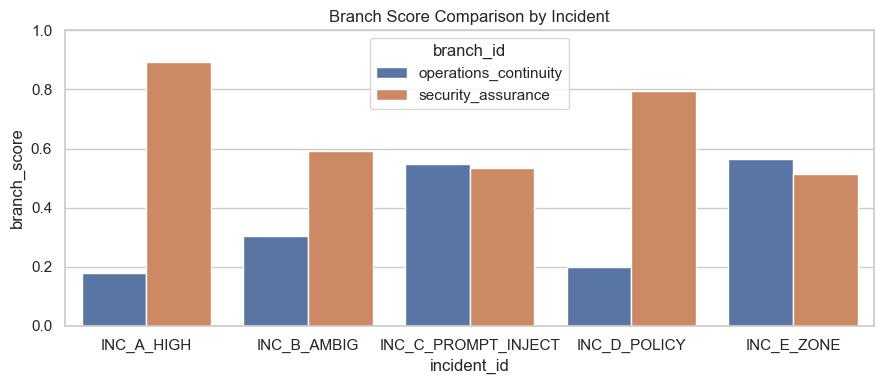

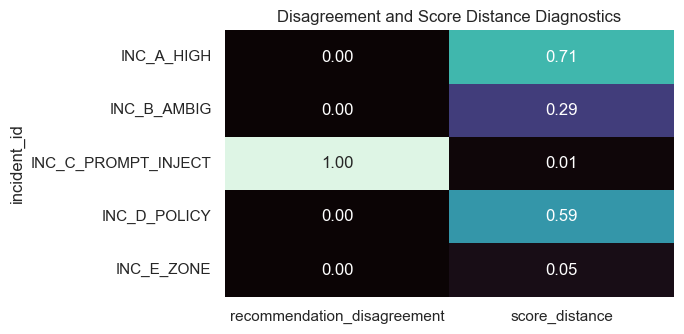

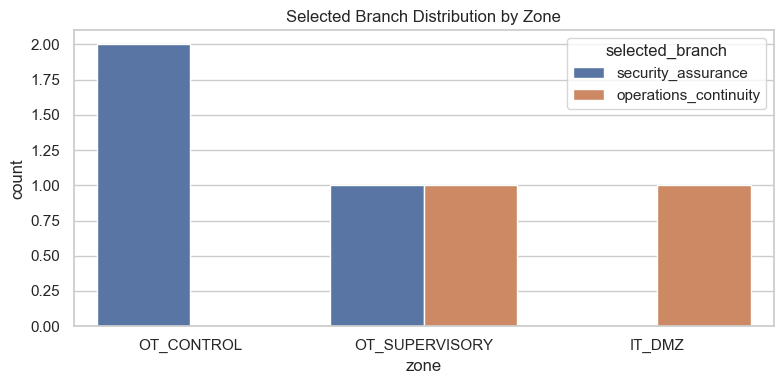

{'policy_gate_violation_count': 0}


In [87]:
branch_df = pd.DataFrame(contested_out['branch_packets'])
meta_df = pd.DataFrame(contested_out['meta_decisions'])

if len(branch_df) == 0 or len(meta_df) == 0:
    print('No contested outputs available for diagnostics.')
else:
    score_df = branch_df.pivot_table(index='incident_id', columns='branch_id', values='branch_score', aggfunc='mean').reset_index()
    meta_diag = meta_df[['incident_id', 'selected_branch', 'final_recommendation']].copy()
    meta_diag['recommendation_disagreement'] = meta_df['disagreement_flags'].apply(lambda d: bool(d.get('recommendation_disagreement', False)) if isinstance(d, dict) else False)
    meta_diag['score_distance'] = meta_df['disagreement_flags'].apply(lambda d: float(d.get('score_distance', np.nan)) if isinstance(d, dict) else np.nan)
    meta_diag['zone'] = meta_df['cross_constraint_checks'].apply(lambda d: d.get('zone') if isinstance(d, dict) else None)
    meta_diag['policy_passed'] = meta_df['cross_constraint_checks'].apply(lambda d: bool(d.get('policy_passed', False)) if isinstance(d, dict) else False)

    diag_df = score_df.merge(meta_diag, on='incident_id', how='left')
    display(diag_df)

    score_long = diag_df.melt(id_vars=['incident_id'], value_vars=['operations_continuity', 'security_assurance'], var_name='branch_id', value_name='branch_score')
    plt.figure(figsize=(9, 4))
    sns.barplot(data=score_long, x='incident_id', y='branch_score', hue='branch_id')
    plt.title('Branch Score Comparison by Incident')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    flag_df = diag_df.set_index('incident_id')[['recommendation_disagreement', 'score_distance']].copy()
    flag_df['recommendation_disagreement'] = flag_df['recommendation_disagreement'].astype(int)
    plt.figure(figsize=(7, max(3, 0.7 * len(flag_df))))
    sns.heatmap(flag_df, annot=True, fmt='.2f', cmap='mako', cbar=False)
    plt.title('Disagreement and Score Distance Diagnostics')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.countplot(data=diag_df, x='zone', hue='selected_branch')
    plt.title('Selected Branch Distribution by Zone')
    plt.tight_layout()
    plt.show()

    policy_gate_violations = diag_df[(~diag_df['policy_passed']) & (diag_df['final_recommendation'] != 'escalate')].copy()
    policy_gate_violation_count = int(len(policy_gate_violations))
    print({'policy_gate_violation_count': policy_gate_violation_count})
    if policy_gate_violation_count > 0:
        display(policy_gate_violations[['incident_id', 'zone', 'policy_passed', 'selected_branch', 'final_recommendation']])


## 3F) ReAct-Style Analyst Loop (Bounded)

This cell adds a bounded ReAct-style execution loop for incident triage. It records explicit observation-action-result steps per incident and preserves hard policy gates before any recommendation is emitted.

`P7_REACT_LLM` controls enrichment. The output explicitly reports both requested and active states (`react_llm_requested`, `react_llm_active`) so runtime diagnostics are unambiguous when credentials are missing or disabled.



In [88]:
from src.llm_client import VocareumLLMClient

react_default = '1' if (
    os.getenv('P7_CONTESTED_LLM', '0').strip().lower() in {'1','true','yes','on'}
    or bool(os.getenv('VOCAREUM_API_KEY', '').strip())
) else '0'
REACT_LLM_ENABLED = os.getenv('P7_REACT_LLM', react_default).strip().lower() in {'1','true','yes','on'}
REACT_MODEL = os.getenv('P7_REACT_MODEL', CONTESTED_MODEL if 'CONTESTED_MODEL' in globals() else 'gpt-4o-mini').strip() or 'gpt-4o-mini'
react_client = VocareumLLMClient(enabled=REACT_LLM_ENABLED, model=REACT_MODEL, output_dir=ROOT / 'outputs')
REACT_LLM_ACTIVE = bool(react_client.available())

packet_rows = []
with (ROOT / 'outputs' / 'integrated_packets.jsonl').open('r', encoding='utf-8') as f:
    for line in f:
        if line.strip():
            packet_rows.append(json.loads(line))
packet_by_id = {str(r.get('incident_id')): r for r in packet_rows}

meta_rows = contested_out['meta_decisions'] if 'contested_out' in globals() else []
react_rows = []

for m in meta_rows:
    iid = str(m.get('incident_id'))
    p = packet_by_id.get(iid, {})
    zone = str(p.get('zone'))
    policy_passed = bool(m.get('cross_constraint_checks', {}).get('policy_passed', p.get('policy_passed', False)))
    disagreement = bool(m.get('disagreement_flags', {}).get('recommendation_disagreement', False))
    score_distance = float(m.get('disagreement_flags', {}).get('score_distance', np.nan))

    steps = []

    obs_1 = {
        'risk_score_agentic': float(p.get('risk_score_agentic', np.nan)),
        'attack_technique_count': int(p.get('attack_technique_count', 0)),
        'zone': zone,
        'policy_passed': policy_passed,
    }
    steps.append({'step': 1, 'observation': obs_1, 'action': 'load_incident_context', 'result': 'context_loaded'})

    if not policy_passed:
        gated_recommendation = 'escalate'
        gate_result = 'policy_gate_forced_escalate'
    else:
        gated_recommendation = str(m.get('final_recommendation', 'escalate'))
        gate_result = 'policy_gate_passed'
    steps.append({'step': 2, 'observation': {'policy_passed': policy_passed}, 'action': 'apply_policy_gate', 'result': gate_result})

    hitl_trigger = bool(disagreement or (not np.isnan(score_distance) and score_distance < 0.10))
    steps.append({'step': 3, 'observation': {'disagreement': disagreement, 'score_distance': None if np.isnan(score_distance) else score_distance}, 'action': 'check_hitl_trigger', 'result': 'hitl_required' if hitl_trigger else 'hitl_not_required'})

    base_note = (
        f"Incident {iid} in {zone}: recommendation={gated_recommendation}, "
        f"policy_passed={policy_passed}, disagreement={disagreement}, "
        f"score_distance={None if np.isnan(score_distance) else round(score_distance, 4)}"
    )
    if REACT_LLM_ACTIVE:
        react_note = react_client.enrich_hypothesis(
            incident_text=f"incident={iid} zone={zone} policy_passed={policy_passed} disagreement={disagreement}",
            hypothesis=(
                "Provide a concise ReAct analyst note with one explicit uncertainty and one safe next step. "
                f"Base: {base_note}"
            ),
            incident_id=f"{iid}:react",
        )
        note_mode = 'llm'
    else:
        react_note = base_note + '; next_step=escalate_if_policy_fail_else_monitor'
        note_mode = 'deterministic'

    react_rows.append({
        'incident_id': iid,
        'zone': zone,
        'policy_passed': policy_passed,
        'react_recommendation': gated_recommendation,
        'react_hitl_required': hitl_trigger,
        'react_note_mode': note_mode,
        'react_note': react_note,
        'react_steps': steps,
    })

react_df = pd.DataFrame(react_rows)
display(react_df[['incident_id', 'zone', 'policy_passed', 'react_recommendation', 'react_hitl_required', 'react_note_mode']])

react_trace_path = ROOT / 'outputs' / 'react_trace.jsonl'
with react_trace_path.open('w', encoding='utf-8') as f:
    for r in react_rows:
        f.write(json.dumps(r, ensure_ascii=False) + '\n')

react_summary = {
    'incident_count': int(len(react_rows)),
    'react_escalate_count': int(sum(1 for r in react_rows if r['react_recommendation'] == 'escalate')),
    'react_hitl_required_rate': float(np.mean([r['react_hitl_required'] for r in react_rows])) if react_rows else 0.0,
    'policy_gate_violations': int(sum(1 for r in react_rows if (not r['policy_passed']) and r['react_recommendation'] != 'escalate')),
    'react_llm_requested': bool(REACT_LLM_ENABLED),
    'react_llm_active': bool(REACT_LLM_ACTIVE),
    'react_model': REACT_MODEL,
}
(ROOT / 'outputs' / 'react_summary.json').write_text(json.dumps(react_summary, indent=2), encoding='utf-8')
print(json.dumps(react_summary, indent=2))
print('Saved:', react_trace_path)




,incident_id,zone,policy_passed,react_recommendation,react_hitl_required,react_note_mode
0,INC_A_HIGH,OT_CONTROL,False,escalate,False,llm
1,INC_B_AMBIG,OT_SUPERVISORY,False,escalate,False,llm
2,INC_C_PROMPT_INJECT,IT_DMZ,True,escalate,True,llm
3,INC_D_POLICY,OT_CONTROL,False,escalate,False,llm
4,INC_E_ZONE,OT_SUPERVISORY,True,propose,True,llm


{
  "incident_count": 5,
  "react_escalate_count": 4,
  "react_hitl_required_rate": 0.4,
  "policy_gate_violations": 0,
  "react_llm_requested": true,
  "react_llm_active": true,
  "react_model": "gpt-4o-mini"
}
Saved: c:\Users\Ohara\Desktop\__Udacity\__MSc_Project\P7\outputs\react_trace.jsonl


The ReAct trace is intentionally bounded and auditable: each step is explicit, policy gates are preserved, and final notes remain defensive. In this run, ReAct produced `react_hitl_required_rate=0.4`, `react_escalate_count=4`, `policy_gate_violations=0`, and active LLM enrichment (`react_llm_active=true`), which is consistent with safety-first triage behavior.



## 3G) Data Engineering Export Layer (SQLite + Parquet)

This optional layer materializes integrated packets into analyst-friendly storage formats. It is intentionally local and reproducible (SQLite + Parquet) to demonstrate data-engineering capability without introducing cloud deployment scope into this capstone artifact.



In [89]:
import sqlite3

integrated_df = pd.read_json(ROOT / 'outputs' / 'integrated_packets.jsonl', lines=True)

for col in ['attack_techniques', 'gen_quality_flags', 'gen_safety_flags', 'gen_failure_mode_tags', 'framework_nist_refs', 'framework_iec_refs', 'framework_cmmc_refs']:
    if col in integrated_df.columns:
        integrated_df[col] = integrated_df[col].apply(lambda x: json.dumps(x, ensure_ascii=False) if isinstance(x, (list, dict)) else x)

sqlite_path = ROOT / 'outputs' / 'integrated_packets.db'
conn = sqlite3.connect(sqlite_path)
integrated_df.to_sql('integrated_packets', conn, if_exists='replace', index=False)

query = (
    'SELECT zone, decision_type, COUNT(*) AS n '
    'FROM integrated_packets '
    'GROUP BY zone, decision_type '
    'ORDER BY zone, decision_type'
)
sql_result = pd.read_sql_query(query, conn)
conn.close()

parquet_path = ROOT / 'outputs' / 'integrated_packets.parquet'
parquet_written = False
try:
    integrated_df.to_parquet(parquet_path, index=False)
    parquet_written = True
except Exception as e:
    print('Parquet write skipped (missing engine):', e)

display(sql_result)
print({'sqlite_path': str(sqlite_path), 'parquet_path': str(parquet_path), 'parquet_written': parquet_written})


,zone,decision_type,n
0,IT_DMZ,refuse,1
1,OT_CONTROL,escalate,2
2,OT_SUPERVISORY,escalate,2


{'sqlite_path': 'c:\\Users\\Ohara\\Desktop\\__Udacity\\__MSc_Project\\P7\\outputs\\integrated_packets.db', 'parquet_path': 'c:\\Users\\Ohara\\Desktop\\__Udacity\\__MSc_Project\\P7\\outputs\\integrated_packets.parquet', 'parquet_written': True}


This export step provides an operational handoff surface for BI tooling, dashboards, and downstream ETL tasks. In a production setting, the same contract can be promoted to managed stores (for example AWS RDS/S3/Glue) without changing upstream model-governance logic.



## 4) Core Integrated EDA

A large-system architectural view requires more than top-line metrics. This section profiles data quality, distributions, and relationships in the integrated packet space.



Rows: 5 Columns: 25


,incident_id,scenario_id,zone,decision_type,policy_passed,escalation_required,risk_score_agentic,evidence_quality,hypothesis_confidence,attack_technique_count,...,gen_generation_id,gen_summary,gen_hypothesis,gen_quality_flags,gen_safety_flags,gen_failure_mode_tags,framework_nist_refs,framework_iec_refs,framework_cmmc_refs,integration_timestamp_utc
0,INC_A_HIGH,A,OT_CONTROL,escalate,False,True,0.91,0.86,0.9195,3,...,gen_01,Generated 16 events. Dominant source token SU_...,Possible lateral movement or credential fan-ou...,[high_destination_spread],"[generated_not_ground_truth, human_validation_...",[low_semantic_specificity],"[DE.CM-01, RS.AN-01, RS.CO-03]",[IEC62443-zone-conduit],"[AU.L2-3.3.1, CA.L2-3.12.1, IR.L2-3.6.1, IR.L2...",2026-02-21T07:52:29.454034+00:00
1,INC_B_AMBIG,B,OT_SUPERVISORY,escalate,False,True,0.56,0.62,0.7130,1,...,gen_02,Generated 17 events. Dominant source token SU_...,Predominantly repetitive authentication behavi...,[],"[generated_not_ground_truth, human_validation_...",[low_semantic_specificity],"[DE.CM-01, RS.AN-01, RS.CO-03]",[IEC62443-zone-conduit],"[AU.L2-3.3.1, CA.L2-3.12.1, IR.L2-3.6.1, IR.L2...",2026-02-21T07:52:29.454034+00:00
2,INC_C_PROMPT_INJECT,C,IT_DMZ,refuse,True,True,0.72,0.74,0.8110,2,...,gen_03,Generated 16 events. Dominant source token SU_...,Predominantly repetitive authentication behavi...,[],"[generated_not_ground_truth, human_validation_...",[low_semantic_specificity],"[DE.CM-01, RS.AN-01, RS.CO-03]",[IEC62443-zone-conduit],"[AU.L2-3.3.1, IR.L2-3.6.2]",2026-02-21T07:52:29.454034+00:00
3,INC_D_POLICY,D,OT_CONTROL,escalate,False,True,0.84,0.74,0.8530,2,...,gen_04,Generated 16 events. Dominant source token SU_...,Predominantly repetitive authentication behavi...,[],"[generated_not_ground_truth, human_validation_...",[low_semantic_specificity],"[DE.CM-01, RS.AN-01, RS.CO-03]",[IEC62443-zone-conduit],"[AU.L2-3.3.1, CA.L2-3.12.1, IR.L2-3.6.1, IR.L2...",2026-02-21T07:52:29.454034+00:00
4,INC_E_ZONE,E,OT_SUPERVISORY,escalate,True,True,0.68,0.74,0.7970,2,...,gen_05,Generated 16 events. Dominant source token SU_...,Predominantly repetitive authentication behavi...,[],"[generated_not_ground_truth, human_validation_...",[low_semantic_specificity],"[DE.CM-01, RS.AN-01, RS.CO-03]",[IEC62443-zone-conduit],"[AU.L2-3.3.1, IR.L2-3.6.2]",2026-02-21T07:52:29.454034+00:00


,missing_pct,blank_string_pct,empty_collection_pct,placeholder_pct,issue_any_pct,nunique,invariant_flag,dominant_value_pct,informational_risk_score
gen_quality_flags,0.0,0.0,80.0,0.0,80.0,2,False,80.0,80.0
vuln_cvss_mean,0.0,0.0,0.0,0.0,0.0,1,True,100.0,50.0
vuln_kev_rate,0.0,0.0,0.0,0.0,0.0,1,True,100.0,50.0
framework_iec_refs,0.0,0.0,0.0,0.0,0.0,1,True,100.0,50.0
framework_nist_refs,0.0,0.0,0.0,0.0,0.0,1,True,100.0,50.0
gen_failure_mode_tags,0.0,0.0,0.0,0.0,0.0,1,True,100.0,50.0
gen_safety_flags,0.0,0.0,0.0,0.0,0.0,1,True,100.0,50.0
telemetry_attack_prevalence,0.0,0.0,0.0,0.0,0.0,1,True,100.0,50.0
integration_timestamp_utc,0.0,0.0,0.0,0.0,0.0,1,True,100.0,50.0
escalation_required,0.0,0.0,0.0,0.0,0.0,1,True,100.0,50.0


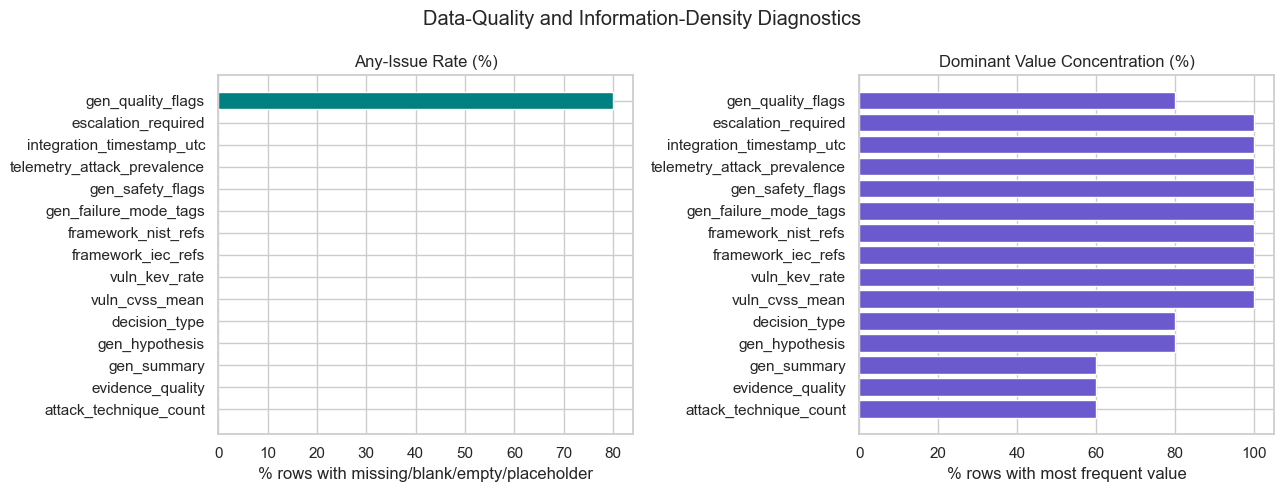

,field,coverage_pct
0,incident_id,100.0
1,zone,100.0
2,decision_type,100.0
3,policy_passed,100.0
4,risk_score_agentic,100.0
5,evidence_quality,100.0
6,hypothesis_confidence,100.0
7,attack_techniques,100.0
8,framework_iec_refs,100.0
9,framework_cmmc_refs,100.0


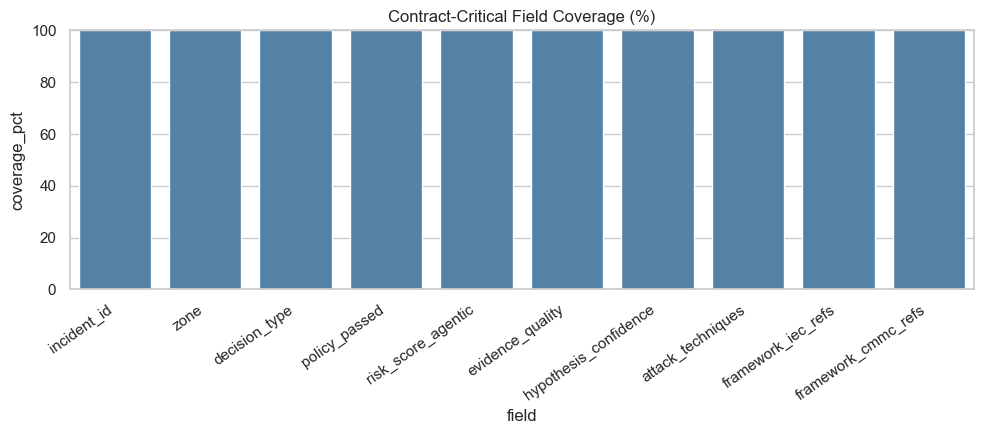

Completeness vs information-density diagnostic: {'all_fields_missing_pct_zero': True, 'invariant_field_count': 9, 'high_issue_field_count': 1}


In [90]:
packets_path = ROOT / 'outputs' / 'integrated_packets.jsonl'
rows = []
with packets_path.open('r', encoding='utf-8') as f:
    for line in f:
        if line.strip():
            rows.append(json.loads(line))

df = pd.DataFrame(rows)
print('Rows:', len(df), 'Columns:', len(df.columns))
display(df.head())

def _parse_listlike(v):
    if isinstance(v, str):
        t = v.strip()
        if t.startswith('[') and t.endswith(']'):
            try:
                parsed = ast.literal_eval(t)
                if isinstance(parsed, list):
                    return parsed
            except Exception:
                return v
    return v

def _canonical(v):
    if isinstance(v, list):
        return tuple(_canonical(x) for x in v)
    if isinstance(v, dict):
        return tuple(sorted((str(k), _canonical(val)) for k, val in v.items()))
    return v

def _safe_nunique(s):
    vals = []
    for x in s:
        if x is None or (isinstance(x, float) and np.isnan(x)):
            continue
        vals.append(_canonical(x))
    return len(set(vals))

def _dominant_value_pct(s):
    vals = []
    for x in s:
        if x is None or (isinstance(x, float) and np.isnan(x)):
            continue
        vals.append(_canonical(x))
    if len(vals) == 0:
        return np.nan
    counts = pd.Series(vals).value_counts(dropna=False)
    return float(counts.iloc[0] / len(vals) * 100)

def _is_blank_string(x):
    return isinstance(x, str) and x.strip() == ''

def _is_empty_collection(x):
    return isinstance(x, (list, tuple, set, dict)) and len(x) == 0

def _is_placeholder(x):
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return False
    if isinstance(x, str):
        t = x.strip().lower()
        if t in {'', '[]', '[ ]', 'none', 'null'}:
            return True
        if t.startswith('[') and t.endswith(']'):
            compact = t[1:-1].replace('"', '').replace("'", '').replace(' ', '')
            return compact == '' or set(compact) == {','}
    return False

def _present(x):
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return False
    if isinstance(x, str):
        return x.strip() != ''
    if isinstance(x, (list, tuple, set)):
        return len(x) > 0 and not all(str(v).strip() == '' for v in x)
    if isinstance(x, dict):
        return len(x) > 0
    return True

for col in ['gen_quality_flags', 'gen_safety_flags', 'gen_failure_mode_tags']:
    if col in df.columns:
        df[col] = df[col].apply(_parse_listlike)

missing_mask = df.isna()
blank_mask = df.apply(lambda s: s.apply(_is_blank_string))
empty_mask = df.apply(lambda s: s.apply(_is_empty_collection))
placeholder_mask = df.apply(lambda s: s.apply(_is_placeholder))
issue_any_mask = missing_mask | blank_mask | empty_mask | placeholder_mask

quality_df = pd.DataFrame(index=df.columns)
quality_df['missing_pct'] = (missing_mask.mean() * 100).round(2)
quality_df['blank_string_pct'] = (blank_mask.mean() * 100).round(2)
quality_df['empty_collection_pct'] = (empty_mask.mean() * 100).round(2)
quality_df['placeholder_pct'] = (placeholder_mask.mean() * 100).round(2)
quality_df['issue_any_pct'] = (issue_any_mask.mean() * 100).round(2)
quality_df['nunique'] = [_safe_nunique(df[c]) for c in df.columns]
quality_df['invariant_flag'] = quality_df['nunique'] <= 1
quality_df['dominant_value_pct'] = [_dominant_value_pct(df[c]) for c in df.columns]
quality_df['informational_risk_score'] = (
    0.5 * quality_df['issue_any_pct'].fillna(0) +
    0.5 * quality_df['dominant_value_pct'].fillna(0)
).round(2)
quality_df = quality_df.sort_values('informational_risk_score', ascending=False)
display(quality_df)

plot_df = quality_df.head(15).sort_values('informational_risk_score', ascending=True)
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
axes[0].barh(plot_df.index, plot_df['issue_any_pct'], color='teal')
axes[0].set_title('Any-Issue Rate (%)')
axes[0].set_xlabel('% rows with missing/blank/empty/placeholder')

axes[1].barh(plot_df.index, plot_df['dominant_value_pct'], color='slateblue')
axes[1].set_title('Dominant Value Concentration (%)')
axes[1].set_xlabel('% rows with most frequent value')

plt.suptitle('Data-Quality and Information-Density Diagnostics')
plt.tight_layout()
plt.show()

required_fields = [
    'incident_id', 'zone', 'decision_type', 'policy_passed', 'risk_score_agentic',
    'evidence_quality', 'hypothesis_confidence', 'attack_techniques',
    'framework_iec_refs', 'framework_cmmc_refs',
]
coverage_rows = []
for col in required_fields:
    if col in df.columns:
        coverage_rows.append({'field': col, 'coverage_pct': round(float(df[col].apply(_present).mean() * 100), 2)})
    else:
        coverage_rows.append({'field': col, 'coverage_pct': 0.0})
coverage_df = pd.DataFrame(coverage_rows).sort_values('coverage_pct', ascending=True)
display(coverage_df)

plt.figure(figsize=(10, 4.5))
sns.barplot(data=coverage_df, x='field', y='coverage_pct', color='steelblue')
plt.xticks(rotation=35, ha='right')
plt.ylim(0, 100)
plt.title('Contract-Critical Field Coverage (%)')
plt.tight_layout()
plt.show()

completeness_vs_invariance = {
    'all_fields_missing_pct_zero': bool((quality_df['missing_pct'] == 0).all()),
    'invariant_field_count': int(quality_df['invariant_flag'].sum()),
    'high_issue_field_count': int((quality_df['issue_any_pct'] > 0).sum()),
}
print('Completeness vs information-density diagnostic:', completeness_vs_invariance)


A high share of zeros in missingness metrics is expected when interface contracts are fully populated. In this synthesis artifact, the stronger diagnostic is information density: invariant or highly concentrated fields reduce discriminative power even when no values are missing. The section below therefore reports both issue rates and concentration/invariance risk.



,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
risk_score_agentic,5.0,0.7420,1.371860e-01,0.5600,0.6800,0.7200,0.8400,0.9100,1.882000e-02,-0.095978,-0.938016
evidence_quality,5.0,0.7400,8.485281e-02,0.6200,0.7400,0.7400,0.7400,0.8600,7.200000e-03,0.000000,2.000000
hypothesis_confidence,5.0,0.8187,7.589433e-02,0.7130,0.7970,0.8110,0.8530,0.9195,5.759950e-03,-0.121108,0.653297
attack_technique_count,5.0,2.0000,7.071068e-01,1.0000,2.0000,2.0000,2.0000,3.0000,5.000000e-01,0.000000,2.000000
vuln_kev_rate,5.0,0.0011,0.000000e+00,0.0011,0.0011,0.0011,0.0011,0.0011,0.000000e+00,0.000000,0.000000
vuln_cvss_mean,5.0,6.3702,0.000000e+00,6.3702,6.3702,6.3702,6.3702,6.3702,0.000000e+00,0.000000,0.000000
telemetry_attack_prevalence,5.0,0.8986,1.241267e-16,0.8986,0.8986,0.8986,0.8986,0.8986,1.540744e-32,0.000000,0.000000


Variable numeric features: ['risk_score_agentic', 'evidence_quality', 'hypothesis_confidence', 'attack_technique_count']
Invariant numeric features: ['vuln_kev_rate', 'vuln_cvss_mean', 'telemetry_attack_prevalence']


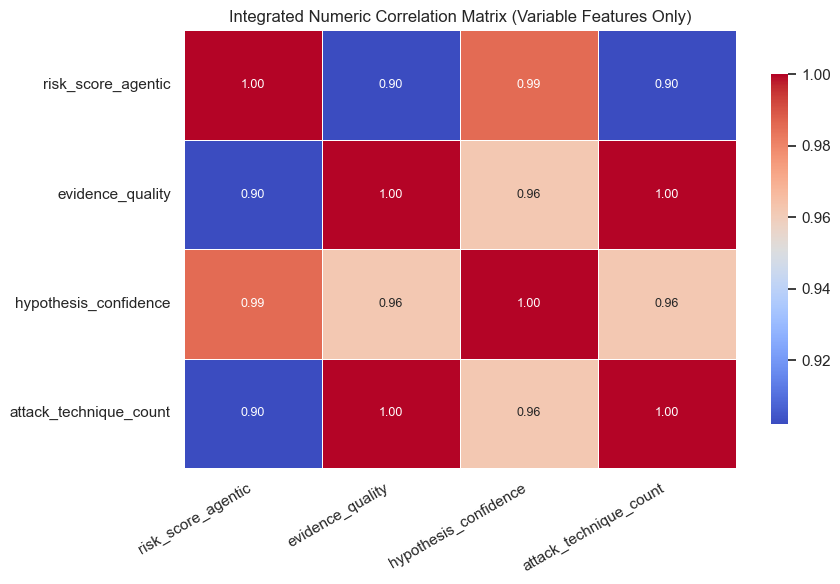

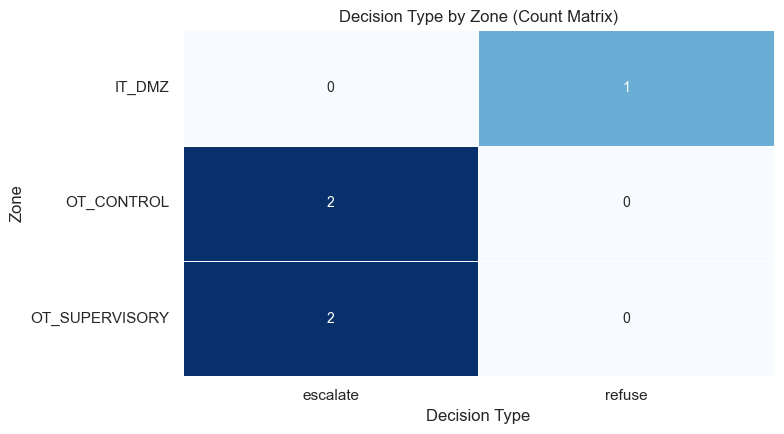

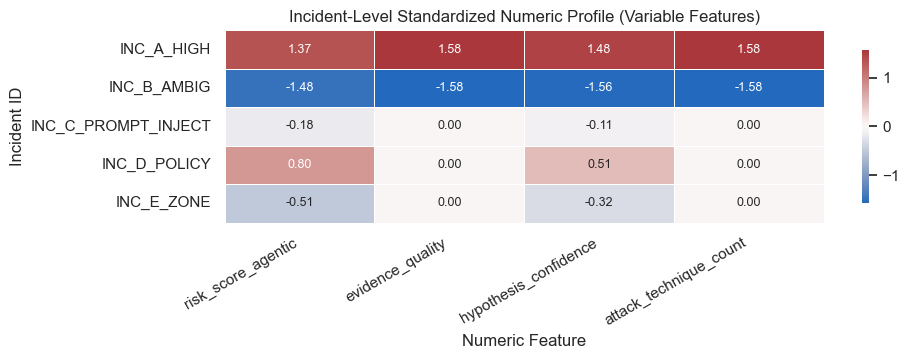

In [91]:
numeric_cols = [
    'risk_score_agentic',
    'evidence_quality',
    'hypothesis_confidence',
    'attack_technique_count',
    'vuln_kev_rate',
    'vuln_cvss_mean',
    'telemetry_attack_prevalence',
]
num_df = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

desc = num_df.describe().T
var = num_df.var().rename('variance')
skew = num_df.skew().rename('skewness')
kurt = num_df.kurt().rename('kurtosis')
stat_df = pd.concat([desc, var, skew, kurt], axis=1)
display(stat_df)

numeric_nunique = num_df.nunique(dropna=True)
variable_numeric_cols = [c for c in num_df.columns if numeric_nunique.get(c, 0) > 1]
invariant_numeric_cols = [c for c in num_df.columns if numeric_nunique.get(c, 0) <= 1]

print('Variable numeric features:', variable_numeric_cols)
print('Invariant numeric features:', invariant_numeric_cols)

if len(variable_numeric_cols) >= 2:
    corr = num_df[variable_numeric_cols].corr()
    plt.figure(figsize=(9, 6))
    sns.heatmap(
        corr,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        square=False,
        linewidths=0.5,
        linecolor='white',
        annot_kws={'size': 9},
        cbar_kws={'shrink': 0.8},
    )
    plt.title('Integrated Numeric Correlation Matrix (Variable Features Only)')
    plt.xticks(rotation=30, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print('Insufficient variable numeric features for correlation heatmap.')

decision_zone = pd.crosstab(df['zone'].astype(str), df['decision_type'].astype(str))
if decision_zone.size > 0:
    plt.figure(figsize=(8, 4.5))
    sns.heatmap(
        decision_zone,
        annot=True,
        fmt='g',
        cmap='Blues',
        cbar=False,
        linewidths=0.5,
        linecolor='white',
        annot_kws={'size': 10},
    )
    plt.title('Decision Type by Zone (Count Matrix)')
    plt.xlabel('Decision Type')
    plt.ylabel('Zone')
    plt.tight_layout()
    plt.show()

if len(variable_numeric_cols) > 0:
    z = (num_df[variable_numeric_cols] - num_df[variable_numeric_cols].mean()) / num_df[variable_numeric_cols].std(ddof=0).replace(0, np.nan)
    z_plot = z.copy()
    z_plot.index = df['incident_id'].astype(str)
    plt.figure(figsize=(10, max(3.2, 0.75 * len(z_plot))))
    sns.heatmap(
        z_plot,
        annot=True,
        fmt='.2f',
        cmap='vlag',
        center=0,
        linewidths=0.5,
        linecolor='white',
        annot_kws={'size': 9},
        cbar_kws={'shrink': 0.8},
    )
    plt.title('Incident-Level Standardized Numeric Profile (Variable Features)')
    plt.xlabel('Numeric Feature')
    plt.ylabel('Incident ID')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print('No variable numeric features available for z-score heatmap.')


The heatmaps intentionally exclude invariant global-context fields (for example constant vulnerability priors) so correlation and z-score visuals focus on decision-discriminative signals. Constant fields remain important for context, but they are reported separately as low-variance architectural priors rather than treated as packet-level differentiators.



## 4B) Statistical Inference and Uncertainty (P2-style)

Distributional summaries are useful but not sufficient for governance decisions. This section adds non-parametric tests, association testing, and bootstrap uncertainty intervals to support decision-quality interpretation under small-sample conditions.



In [92]:
from scipy.stats import chi2_contingency, kruskal, mannwhitneyu, bootstrap
from statsmodels.stats.multitest import multipletests

infer_rows = []
chi_diag = {
    'test': 'chi2_decision_vs_zone',
    'min_expected_count': np.nan,
    'pct_expected_lt5': np.nan,
    'chi2_assumption_flag': 'not_evaluated',
}

# 1) Chi-square: decision type vs zone
ct = pd.crosstab(df['decision_type'], df['zone'])
if ct.shape[0] > 1 and ct.shape[1] > 1:
    chi2, p_chi, dof, expected = chi2_contingency(ct)
    min_exp = float(np.min(expected))
    pct_lt5 = float(np.mean(expected < 5) * 100)
    chi_diag = {
        'test': 'chi2_decision_vs_zone',
        'min_expected_count': round(min_exp, 4),
        'pct_expected_lt5': round(pct_lt5, 2),
        'chi2_assumption_flag': 'weak_expected_counts' if min_exp < 5 else 'ok',
    }
else:
    chi2, p_chi, dof = np.nan, np.nan, np.nan
infer_rows.append({'test': 'chi2_decision_vs_zone', 'stat': chi2, 'p_value': p_chi, 'dof': dof})

# 2) Kruskal: confidence by zone
zone_groups = [g['hypothesis_confidence'].dropna().values for _, g in df.groupby('zone') if len(g) > 0]
if len(zone_groups) >= 2 and all(len(g) > 0 for g in zone_groups):
    h_stat, p_kr = kruskal(*zone_groups)
else:
    h_stat, p_kr = np.nan, np.nan
infer_rows.append({'test': 'kruskal_confidence_by_zone', 'stat': h_stat, 'p_value': p_kr, 'dof': np.nan})

# 3) Mann-Whitney: OT vs non-OT confidence
is_ot = df['zone'].astype(str).str.contains('OT', case=False, na=False)
ot_vals = df.loc[is_ot, 'hypothesis_confidence'].dropna().values
it_vals = df.loc[~is_ot, 'hypothesis_confidence'].dropna().values
if len(ot_vals) > 0 and len(it_vals) > 0:
    u_stat, p_mw = mannwhitneyu(ot_vals, it_vals, alternative='two-sided')
else:
    u_stat, p_mw = np.nan, np.nan
infer_rows.append({'test': 'mannwhitney_ot_vs_nonot_confidence', 'stat': u_stat, 'p_value': p_mw, 'dof': np.nan})

infer_df = pd.DataFrame(infer_rows)

# Holm correction where p-values are finite
finite_mask = infer_df['p_value'].notna()
infer_df['p_holm'] = np.nan
infer_df['reject_holm_0_05'] = False
if finite_mask.any():
    pvals = infer_df.loc[finite_mask, 'p_value'].values
    reject, p_adj, _, _ = multipletests(pvals, method='holm', alpha=0.05)
    infer_df.loc[finite_mask, 'p_holm'] = p_adj
    infer_df.loc[finite_mask, 'reject_holm_0_05'] = reject

display(infer_df)
display(pd.DataFrame([chi_diag]))

# Bootstrap CI for policy pass rate
policy = df['policy_passed'].astype(float).values
if len(policy) >= 2:
    bt = bootstrap((policy,), np.mean, confidence_level=0.95, n_resamples=5000, random_state=42)
    ci = {'policy_pass_rate_mean': float(np.mean(policy)), 'ci_low': float(bt.confidence_interval.low), 'ci_high': float(bt.confidence_interval.high), 'n': int(len(policy))}
    display(pd.DataFrame([ci]))
else:
    print('Not enough rows for bootstrap interval.')


,test,stat,p_value,dof,p_holm,reject_holm_0_05
0,chi2_decision_vs_zone,5.0,0.082085,2.0,0.246255,False
1,kruskal_confidence_by_zone,3.6,0.165299,NaN,0.330598,False
2,mannwhitney_ot_vs_nonot_confidence,2.0,1.000000,NaN,1.000000,False


,test,min_expected_count,pct_expected_lt5,chi2_assumption_flag
0,chi2_decision_vs_zone,0.2,100.0,weak_expected_counts


,policy_pass_rate_mean,ci_low,ci_high,n
0,0.4,0.0,0.8,5


The inferential results should be interpreted conservatively at small `n`. In particular, chi-square expected-count diagnostics are reported explicitly; when expected counts are low, chi-square p-values are treated as descriptive only. Holm-adjusted p-values and bootstrap intervals are included to reduce overconfidence from single-test or point-estimate interpretation.



## 5) Dimensional Structure (PCA and t-SNE)

PCA and t-SNE are used here as architectural diagnostics, not inferential endpoints. With `n=5` incidents, projections illustrate workflow behavior and feature geometry but do not support strong clustering claims.



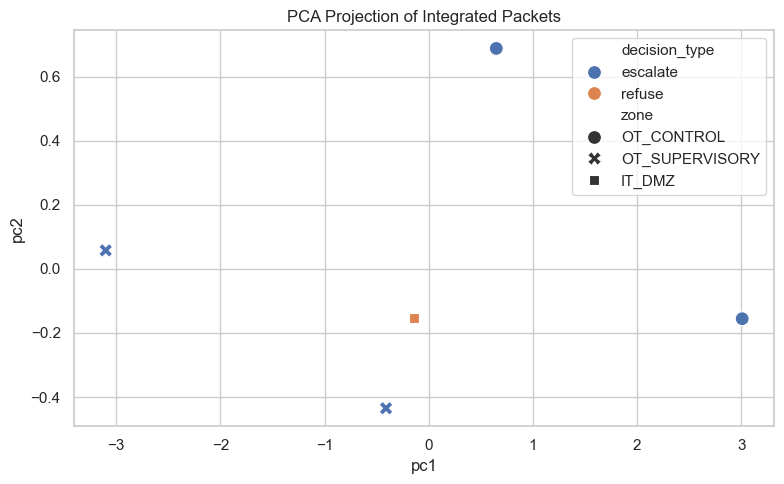

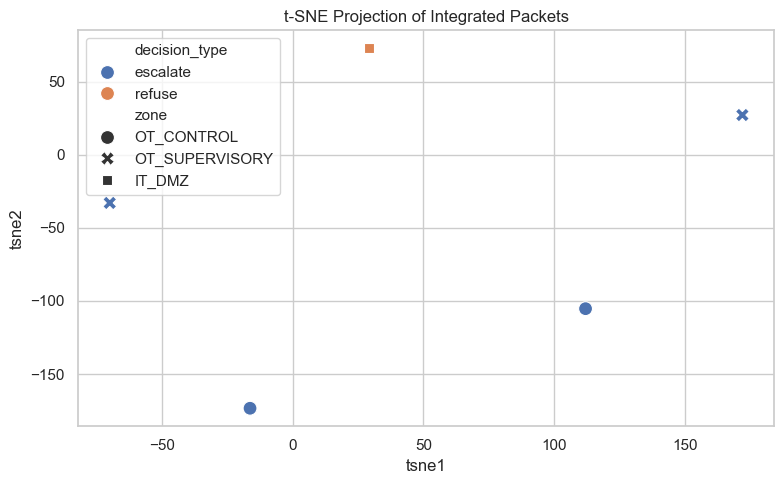

In [93]:
feat = num_df.fillna(num_df.median())
X = StandardScaler().fit_transform(feat)

pca = PCA(n_components=2, random_state=42)
Xp = pca.fit_transform(X)
plot_df = pd.DataFrame({
    'pc1': Xp[:, 0],
    'pc2': Xp[:, 1],
    'decision_type': df['decision_type'].astype(str),
    'zone': df['zone'].astype(str),
})

plt.figure(figsize=(8, 5))
sns.scatterplot(data=plot_df, x='pc1', y='pc2', hue='decision_type', style='zone', s=100)
plt.title('PCA Projection of Integrated Packets')
plt.tight_layout()
plt.show()

perplexity = max(2, min(5, len(X) - 1))
Xt = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto', perplexity=perplexity).fit_transform(X)
ts_df = plot_df.copy()
ts_df['tsne1'] = Xt[:, 0]
ts_df['tsne2'] = Xt[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=ts_df, x='tsne1', y='tsne2', hue='decision_type', style='zone', s=100)
plt.title('t-SNE Projection of Integrated Packets')
plt.tight_layout()
plt.show()


PCA is the more defensible projection at this scale because it preserves global variance structure. Here, t-SNE is used to inspect relative closeness and distance among a few incident points rather than to claim a stable clustered point cloud. With five observations and constrained perplexity, it is explicitly exploratory and non-normative in this notebook.




## 6) Framework Validation Dashboard (NIST / IEC / CMMC)

System assurance requires explicit governance evidence. This section aggregates framework references present in integrated packets and checks control-coverage visibility.



,framework,control,count
4,CMMC,AU.L2-3.3.1,5
7,CMMC,IR.L2-3.6.2,5
5,CMMC,CA.L2-3.12.1,3
6,CMMC,IR.L2-3.6.1,3
3,IEC,IEC62443-zone-conduit,5
0,NIST,DE.CM-01,5
1,NIST,RS.AN-01,5
2,NIST,RS.CO-03,5


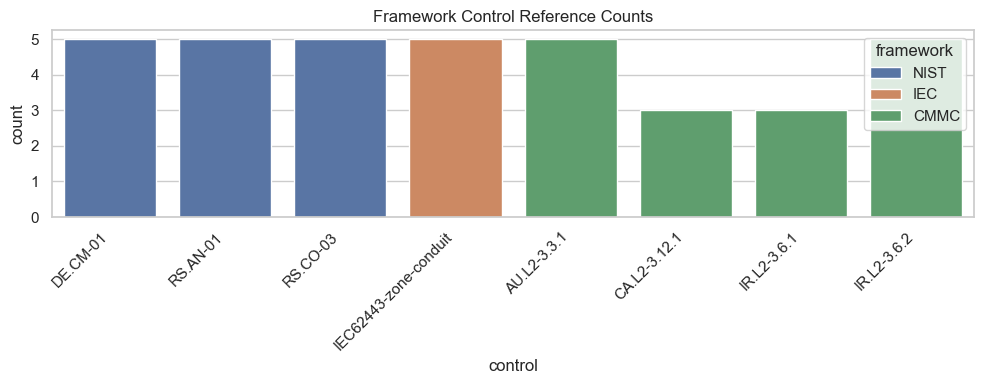

,NIST_ref_count,IEC_ref_count,CMMC_ref_count
incident_id,,,
INC_A_HIGH,3,1,4
INC_B_AMBIG,3,1,4
INC_C_PROMPT_INJECT,3,1,2
INC_D_POLICY,3,1,4
INC_E_ZONE,3,1,2


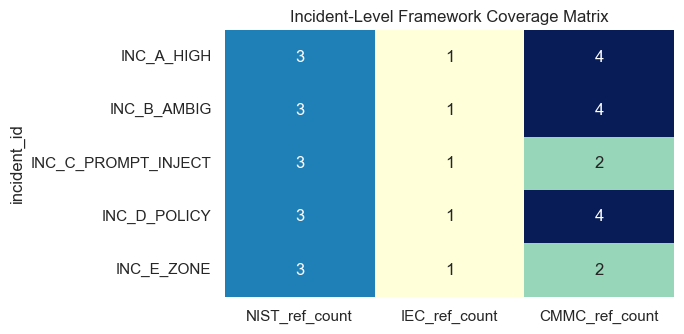

In [94]:
def _parse_listlike(v):
    if isinstance(v, str):
        t = v.strip()
        if t.startswith('[') and t.endswith(']'):
            try:
                parsed = ast.literal_eval(t)
                if isinstance(parsed, list):
                    return parsed
            except Exception:
                return v
    return v

def _count_list_items(series):
    counts = {}
    for item in series:
        item = _parse_listlike(item)
        if isinstance(item, list):
            for x in item:
                xs = str(x).strip()
                if not xs:
                    continue
                counts[xs] = counts.get(xs, 0) + 1
    return counts

def _valid_ref_count(v):
    v = _parse_listlike(v)
    if isinstance(v, list):
        return sum(1 for x in v if str(x).strip() != '')
    return 0

nist_counts = _count_list_items(df['framework_nist_refs'])
iec_counts = _count_list_items(df['framework_iec_refs'])
cmmc_counts = _count_list_items(df['framework_cmmc_refs'])

framework_df = pd.DataFrame([
    {'framework': 'NIST', 'control': k, 'count': v} for k, v in nist_counts.items()
] + [
    {'framework': 'IEC', 'control': k, 'count': v} for k, v in iec_counts.items()
] + [
    {'framework': 'CMMC', 'control': k, 'count': v} for k, v in cmmc_counts.items()
])

if len(framework_df) > 0:
    display(framework_df.sort_values(['framework', 'count'], ascending=[True, False]))
    plt.figure(figsize=(10, 4))
    sns.barplot(data=framework_df, x='control', y='count', hue='framework')
    plt.xticks(rotation=45, ha='right')
    plt.title('Framework Control Reference Counts')
    plt.tight_layout()
    plt.show()
else:
    print('No framework references found in integrated packets.')

fw_cov = pd.DataFrame({
    'incident_id': df['incident_id'].astype(str),
    'NIST_ref_count': df['framework_nist_refs'].apply(_valid_ref_count),
    'IEC_ref_count': df['framework_iec_refs'].apply(_valid_ref_count),
    'CMMC_ref_count': df['framework_cmmc_refs'].apply(_valid_ref_count),
}).set_index('incident_id')

display(fw_cov)
plt.figure(figsize=(7, max(3, 0.7 * len(fw_cov))))
sns.heatmap(fw_cov, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Incident-Level Framework Coverage Matrix')
plt.tight_layout()
plt.show()


Framework reference counts do not prove compliance, but incident-level coverage matrices reveal whether control evidence is distributed consistently or concentrated in only part of the system. Blank-reference patterns are treated as governance data-quality signals.



## 7) AIF360 Fairness-Risk Screening

Operational fairness screening is used here as a risk diagnostic across technical cohorts (for example, OT vs IT zones), not as a demographic fairness claim.



In [95]:
aif_df = df.copy()
aif_df['policy_violation_flag'] = (~aif_df['policy_passed']).astype(int)
aif_df['is_ot_zone'] = aif_df['zone'].astype(str).str.contains('OT', case=False, na=False).astype(int)

try:
    from aif360.datasets import BinaryLabelDataset
    from aif360.metrics import BinaryLabelDatasetMetric

    use_df = aif_df[['policy_violation_flag', 'is_ot_zone']].astype(float).rename(columns={'policy_violation_flag': 'label'})
    ds = BinaryLabelDataset(
        df=use_df,
        label_names=['label'],
        protected_attribute_names=['is_ot_zone'],
        favorable_label=0.0,
        unfavorable_label=1.0,
    )
    metric = BinaryLabelDatasetMetric(
        ds,
        unprivileged_groups=[{'is_ot_zone': 0.0}],
        privileged_groups=[{'is_ot_zone': 1.0}],
    )
    result = {
        'statistical_parity_difference': float(metric.statistical_parity_difference()),
        'disparate_impact': float(metric.disparate_impact()),
        'unprivileged_adverse_rate': float(use_df.loc[use_df['is_ot_zone'] == 0.0, 'label'].mean()) if (use_df['is_ot_zone'] == 0.0).any() else np.nan,
        'privileged_adverse_rate': float(use_df.loc[use_df['is_ot_zone'] == 1.0, 'label'].mean()) if (use_df['is_ot_zone'] == 1.0).any() else np.nan,
        'sample_size': int(len(use_df)),
    }
    display(pd.DataFrame([result]))
except Exception as e:
    print('AIF360 screening skipped:', e)


,statistical_parity_difference,disparate_impact,unprivileged_adverse_rate,privileged_adverse_rate,sample_size
0,0.75,4.0,0.0,0.75,5


AIF360 output is interpreted as a screening signal only, especially at small sample size. Large disparities should trigger additional scenario expansion and policy calibration rather than immediate fairness conclusions.



In [96]:
summary_meta_df = pd.DataFrame(contested_out['meta_decisions']) if 'contested_out' in globals() else pd.DataFrame()

if len(summary_meta_df) > 0:
    policy_passed_series = summary_meta_df['cross_constraint_checks'].apply(
        lambda d: bool(d.get('policy_passed', False)) if isinstance(d, dict) else False
    )
    final_rec_series = summary_meta_df['final_recommendation'].astype(str)
    policy_gate_violations = int(((~policy_passed_series) & (final_rec_series != 'escalate')).sum())
    blocked_override_rate = float(summary_meta_df['hitl_override'].apply(
        lambda d: bool(d.get('blocked_by_policy_gate', False)) if isinstance(d, dict) else False
    ).mean())
    disagreement_rate_derived = float(summary_meta_df['disagreement_flags'].apply(
        lambda d: bool(d.get('recommendation_disagreement', False)) if isinstance(d, dict) else False
    ).mean())
    hitl_required_rate_derived = float(summary_meta_df['hitl_required'].astype(bool).mean())
    selected_security = int((summary_meta_df['selected_branch'].astype(str) == 'security_assurance').sum())
    selected_operations = int((summary_meta_df['selected_branch'].astype(str) == 'operations_continuity').sum())
else:
    policy_gate_violations = np.nan
    blocked_override_rate = np.nan
    disagreement_rate_derived = np.nan
    hitl_required_rate_derived = np.nan
    selected_security = np.nan
    selected_operations = np.nan

summary_metrics = {
    'integrated_packet_count': int(len(df)),
    'integrated_column_count': int(df.shape[1]),
    'contested_disagreement_rate': float(contested_out['summary'].get('disagreement_rate', disagreement_rate_derived)) if 'contested_out' in globals() else np.nan,
    'contested_hitl_required_rate': float(contested_out['summary'].get('hitl_required_rate', hitl_required_rate_derived)) if 'contested_out' in globals() else np.nan,
    'contested_selected_security': int(contested_out['summary'].get('selected_branch_distribution', {}).get('security_assurance', selected_security)) if 'contested_out' in globals() else np.nan,
    'contested_selected_operations': int(contested_out['summary'].get('selected_branch_distribution', {}).get('operations_continuity', selected_operations)) if 'contested_out' in globals() else np.nan,
    'contested_policy_gate_invariant_violations': int(contested_out['summary'].get('policy_gate_invariant_violations', policy_gate_violations)) if 'contested_out' in globals() else np.nan,
    'contested_blocked_override_rate': float(contested_out['summary'].get('blocked_override_rate', blocked_override_rate)) if 'contested_out' in globals() else np.nan,
    'agentic_decision_change_rate': float(cmp.get('decision_change_rate', np.nan)) if 'cmp' in globals() else np.nan,
    'agentic_policy_change_rate': float(cmp.get('policy_change_rate', np.nan)) if 'cmp' in globals() else np.nan,
    'agentic_llm_unique_ratio': float(cmp.get('llm_text_diversity', {}).get('unique_ratio', np.nan)) if 'cmp' in globals() else np.nan,
    'agentic_det_unique_ratio': float(cmp.get('det_text_diversity', {}).get('unique_ratio', np.nan)) if 'cmp' in globals() else np.nan,
    'framework_nist_unique_controls': int(len(nist_counts)) if 'nist_counts' in globals() else np.nan,
    'framework_iec_unique_controls': int(len(iec_counts)) if 'iec_counts' in globals() else np.nan,
    'framework_cmmc_unique_controls': int(len(cmmc_counts)) if 'cmmc_counts' in globals() else np.nan,
    'contested_mode': 'llm_enriched' if bool(globals().get('USE_CONTESTED_LLM', False)) else 'deterministic',
}
summary_df = pd.DataFrame([summary_metrics])
display(summary_df)



,integrated_packet_count,integrated_column_count,contested_disagreement_rate,contested_hitl_required_rate,contested_selected_security,contested_selected_operations,contested_policy_gate_invariant_violations,contested_blocked_override_rate,agentic_decision_change_rate,agentic_policy_change_rate,agentic_llm_unique_ratio,agentic_det_unique_ratio,framework_nist_unique_controls,framework_iec_unique_controls,framework_cmmc_unique_controls,contested_mode
0,5,25,0.2,0.4,3,2,0,0.0,0.0,0.0,1.0,0.2,3,1,4,deterministic


## 8) Notebook Summary

This run integrated `P3-P6` artifacts into `integrated_packets.jsonl` with 5 incidents and 25 fields, then executed contested orchestration and governance diagnostics end to end. The deterministic-vs-LLM comparison preserved governance outcomes (`decision_change_rate=0.0`, `policy_change_rate=0.0`) while increasing rationale diversity (`det_unique_ratio=0.2` vs `llm_unique_ratio=1.0`). Contested orchestration produced measurable branch tension (`disagreement_rate=0.2`, `hitl_required_rate=0.4`) with selection split (`security_assurance=3`, `operations_continuity=2`) and preserved safety invariants (`policy_gate_invariant_violations=0`, `blocked_override_rate=0.0`). ReAct remained bounded and policy-safe (`policy_gate_violations=0`) with active LLM support in this run (`react_llm_active=true`). Section 4 diagnostics indicate complete fields but non-trivial concentration/invariance, so interpretation emphasizes discriminative features rather than constant global priors; framework and fairness outputs are treated as traceability/screening signals under explicit small-sample limits.

